                           Count          Mean       Std Dev     Min  \
Year_Birth                2240.0   1968.805804     11.984069  1893.0   
Income                    2240.0  52247.251354  25037.797168  1730.0   
Kidhome                   2240.0      0.444196      0.538398     0.0   
Teenhome                  2240.0      0.506250      0.544538     0.0   
Recency                   2240.0     49.109375     28.962453     0.0   
MntWines                  2240.0    303.935714    336.597393     0.0   
MntFruits                 2240.0     26.302232     39.773434     0.0   
MntMeatProducts           2240.0    166.950000    225.715373     0.0   
MntFishProducts           2240.0     37.525446     54.628979     0.0   
MntSweetProducts          2240.0     27.062946     41.280498     0.0   
MntGoldProds              2240.0     44.021875     52.167439     0.0   
NumDealsPurchases         2240.0      2.325000      1.932238     0.0   
NumWebPurchases           2240.0      4.084821      2.778714    

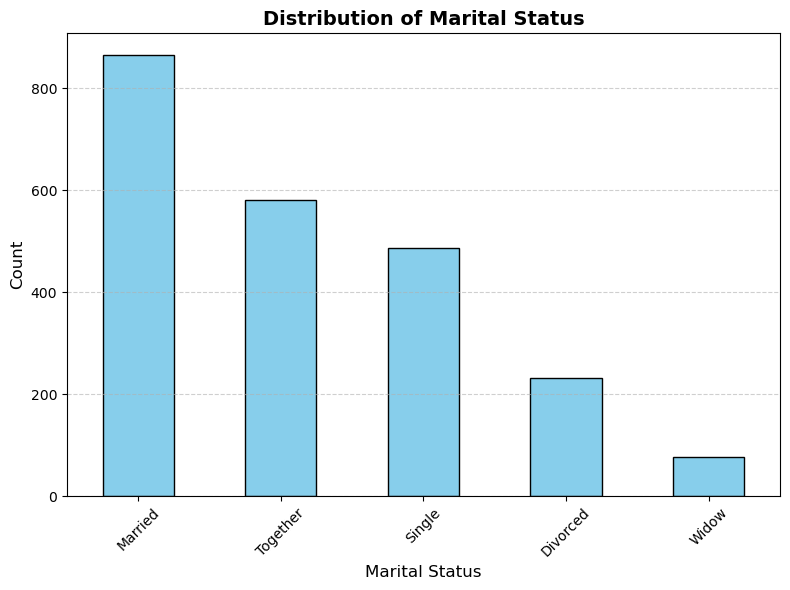

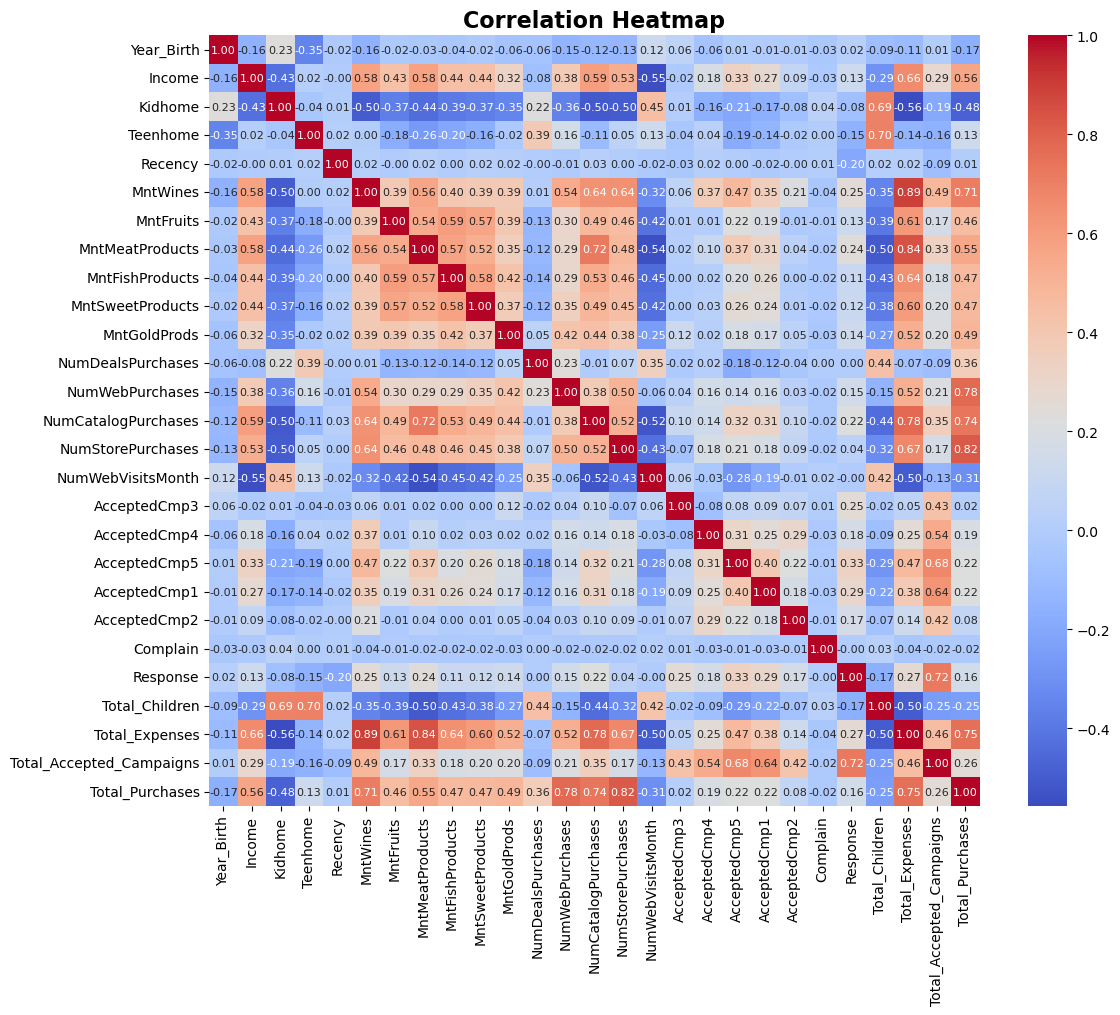

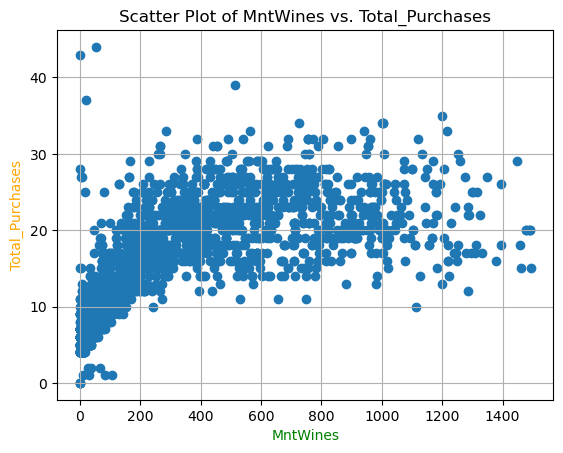

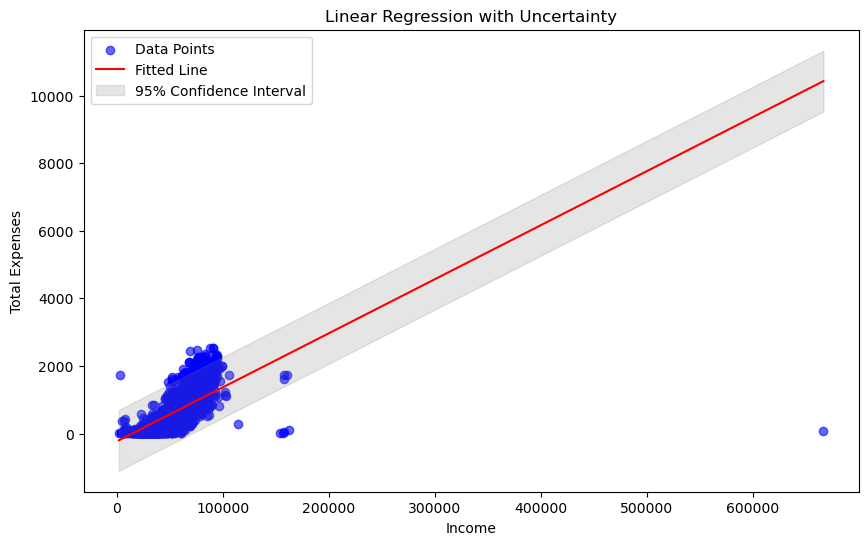

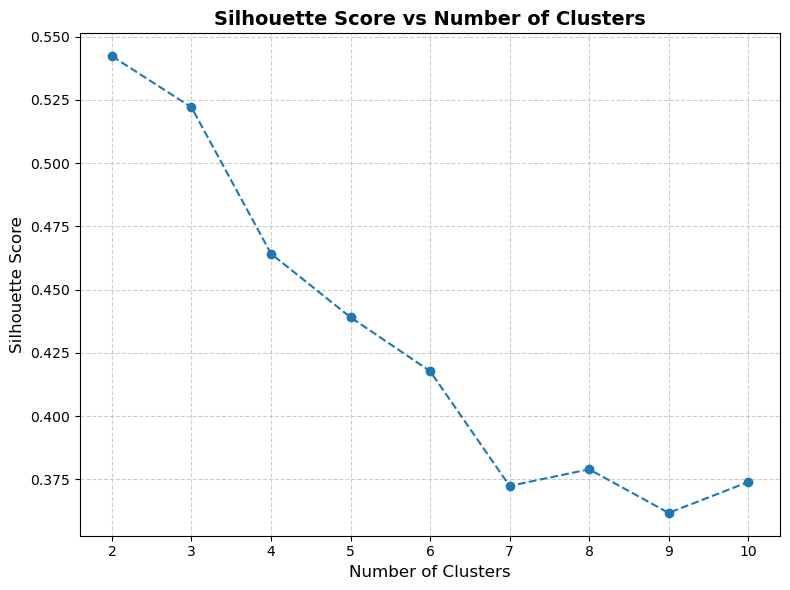

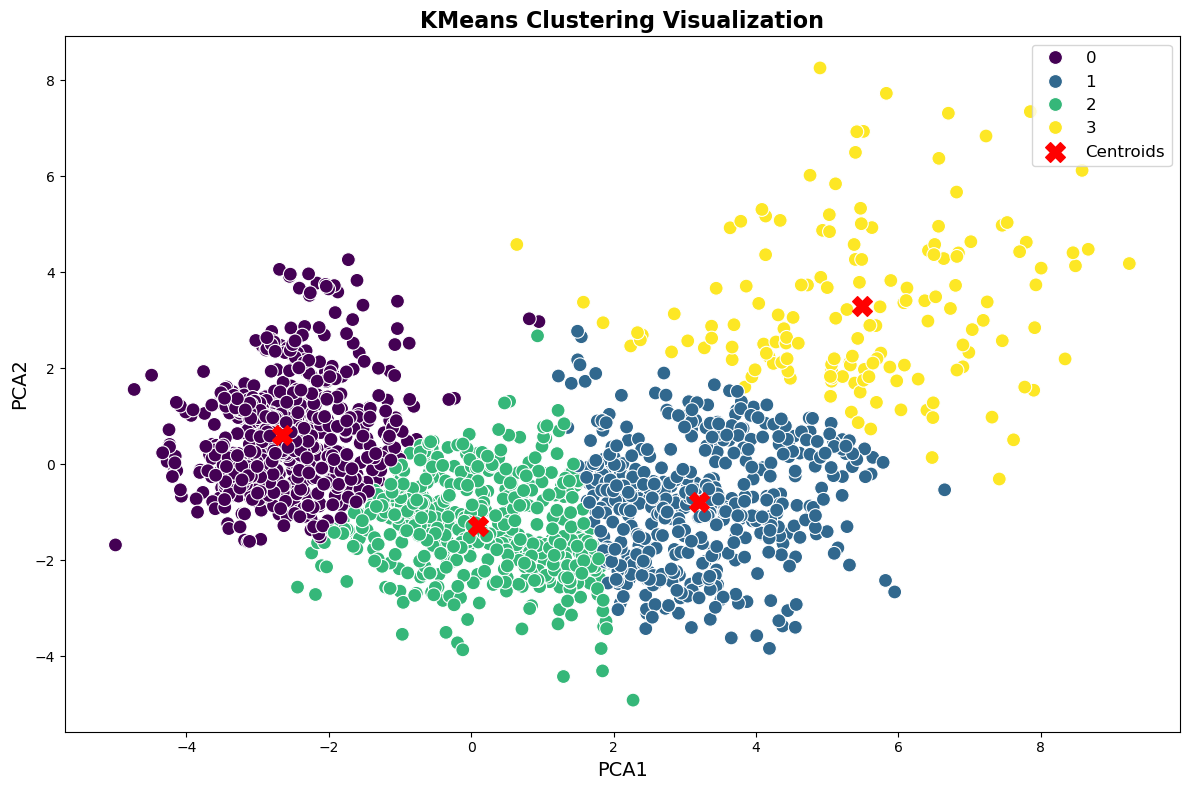

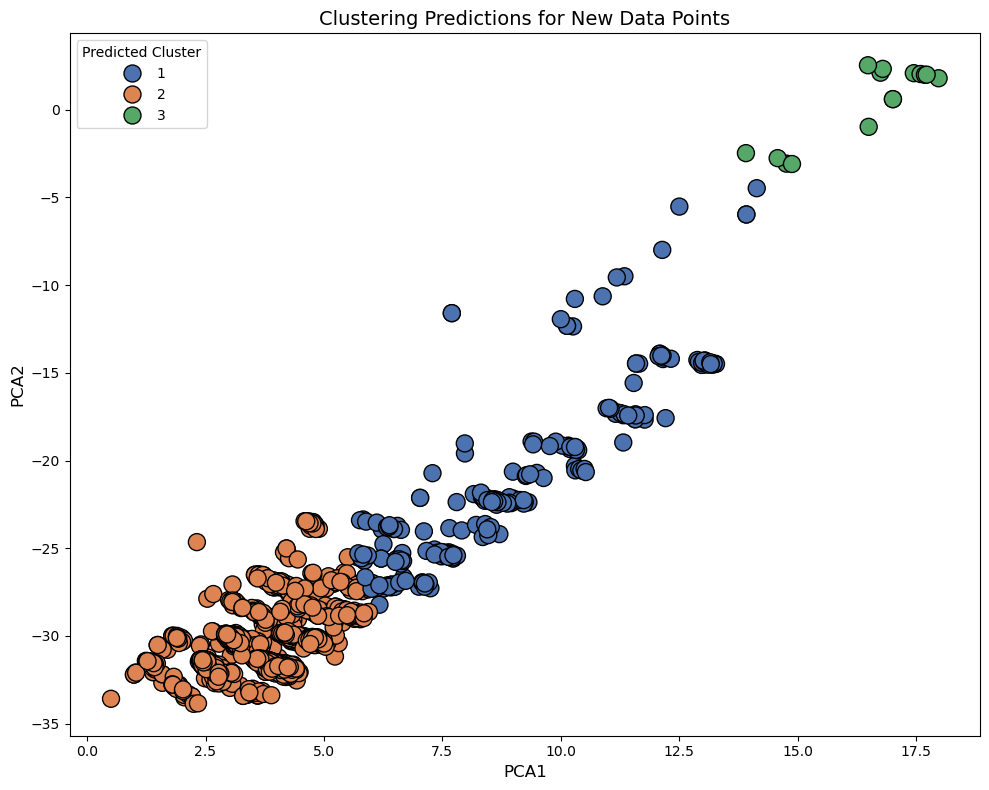

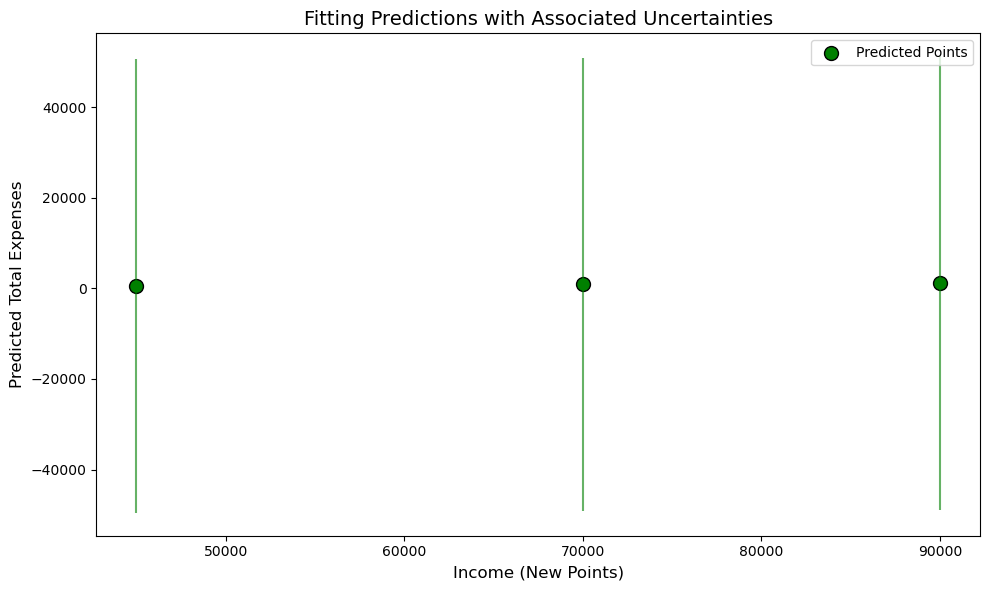

Verification Results:
       New_Point  Predicted_Cluster  Assigned_Centroid  Distance_to_Centroid
0        Point 1                  2                  2             26.706031
1        Point 2                  2                  2             30.266747
2        Point 3                  2                  2             29.365979
3        Point 4                  2                  2             28.914460
4        Point 5                  2                  2             29.373205
...          ...                ...                ...                   ...
2235  Point 2236                  2                  2             30.671766
2236  Point 2237                  2                  2             26.481350
2237  Point 2238                  1                  1             26.483050
2238  Point 2239                  2                  2             30.775700
2239  Point 2240                  2                  2             27.560750

[2240 rows x 4 columns]
Clustering Verification Resul

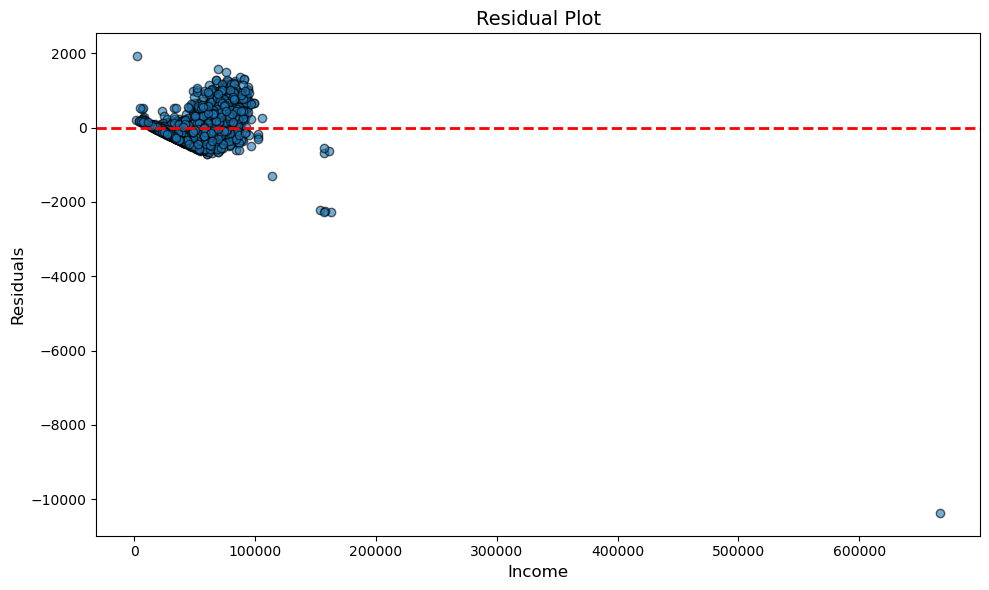

Regression Verification Results:
    New_Income  Predicted_Expenses
0       45000          489.924901
1       70000          889.639592
2       90000         1209.411345


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import pairwise_distances_argmin_min
import warnings
warnings.filterwarnings("ignore")


#scatter plot
def MntWines_Total_Purchases(data):
    """
    Creates a scatter plot to visualize the relationship between 
    Education and Income in the provided dataset.

    Parameters:
    data : pandas.DataFrame
        A DataFrame containing the 'Education' and 'Income' columns.
    """
    
    clean_data = data.dropna(subset=['MntWines', 'Total_Purchases'])
    plt.scatter(x=clean_data['MntWines'], y=clean_data['Total_Purchases'])
    plt.xlabel('MntWines',color='green')
    plt.ylabel('Total_Purchases',color='orange')
    plt.title('Scatter Plot of MntWines vs. Total_Purchases')
    plt.grid()
    plt.show()


    
# Preprocess Data
def preprocess_data(filepath):
    """
    Preprocess the dataset for clustering and analysis.

    Parameters:
    filepath (str): Path to the dataset file.

    Returns:
    DataFrame: Cleaned and preprocessed data.
    ndarray: Scaled numerical data.
    StandardScaler: Fitted scaler for scaling new points.
    """
    data = pd.read_csv(filepath, sep='\t')
    data['Income'] = data['Income'].fillna(data['Income'].mean())
    data.drop(['ID', 'Dt_Customer', 'Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)
    data['Marital_Status'] = data['Marital_Status'].replace({'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})
    data['Education'] = data['Education'].replace({'Basic': 'UG', '2n Cycle': 'UG'})
    data['Total_Children'] = data['Teenhome'] + data['Kidhome']
    data['Total_Expenses'] = (
        data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
        data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
    )
    data['Total_Accepted_Campaigns'] = (
        data['AcceptedCmp1'] + data['AcceptedCmp2'] +
        data['AcceptedCmp3'] + data['AcceptedCmp4'] +
        data['AcceptedCmp5'] + data['Response']
    )
    data['Total_Purchases'] = (
        data['NumWebPurchases'] + data['NumCatalogPurchases'] +
        data['NumStorePurchases'] + data['NumDealsPurchases']
    )
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_data)
    return data, scaled_data, scaler



# Define the compute_numeric_statistics function
def compute_numeric_statistics(dataframe):
    """
    Compute summary statistics for numeric columns in the DataFrame.

    This function calculates the following statistics for each numeric column:
    - Count, Mean, Standard Deviation, Min, 25th percentile, 50th percentile (Median), 75th percentile, Max
    - Skewness, Kurtosis

    Parameters:
    dataframe (pandas.DataFrame): The input DataFrame containing numeric columns.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed statistics.
    """
    numeric_columns = dataframe.select_dtypes(include=['int', 'float']).columns
    statistics_summary = dataframe[numeric_columns].describe().transpose()
    median_values = dataframe[numeric_columns].median()
    skew_values = dataframe[numeric_columns].skew()
    kurtosis_values = dataframe[numeric_columns].kurtosis()
    
    # Combine all statistics into one DataFrame
    combined_statistics = pd.concat(
        [statistics_summary, median_values, skew_values, kurtosis_values], axis=1
    )
    combined_statistics.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', 'Median', 'Skewness', 'Kurtosis']
    
    return combined_statistics

# Bar Chart
def plot_bar_chart(data, column, title, xlabel):
    """
    Plot a bar chart for a categorical column.

    Parameters:
    data (DataFrame): Dataset.
    column (str): Column to plot.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Correlation Heatmap
def plot_correlation_heatmap(data):
    """
    Plot a heatmap showing correlations between numerical features.

    Parameters:
    data (DataFrame): Dataset to analyze.

    Returns:
    None
    """
    numeric_data = data.select_dtypes(include='number')
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
                cbar=True, square=True, annot_kws={"size": 8})
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


#  Linear Regression with Confidence Intervals
def linear_regression_with_uncertainty(x, y):
    """
    Perform linear regression and show predictions with uncertainties.

    Parameters:
    x (Series or ndarray): Independent variable (e.g., Income).
    y (Series or ndarray): Dependent variable (e.g., Total Expenses).

    Returns:
    LinearRegression: The fitted regression model.
    """
    x = x.values.reshape(-1, 1)
    y = y.values
    regressor = LinearRegression()
    regressor.fit(x, y)
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_pred = regressor.predict(x_range)
    y_std = np.std(y - regressor.predict(x))  # Calculate residual standard deviation
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.6, label='Data Points')
    plt.plot(x_range, y_pred, color='red', label='Fitted Line')
    plt.fill_between(
        x_range.flatten(), 
        y_pred - 2*y_std, 
        y_pred + 2*y_std, 
        color='gray', alpha=0.2, label='95% Confidence Interval'
    )
    plt.xlabel("Income")
    plt.ylabel("Total Expenses")
    plt.title("Linear Regression with Uncertainty")
    plt.legend()
    plt.show()
    return regressor


#  Silhouette Scores
def plot_silhouette_scores(data, max_clusters=10):
    """
    Calculate and plot silhouette scores for a range of cluster sizes.

    Parameters:
    data (ndarray): PCA-transformed data.
    max_clusters (int): Maximum number of clusters to test.

    Returns:
    None
    """
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


#  KMeans Clustering
def kmeans_clustering(data, n_clusters=4):
    """
    Perform K-Means clustering and visualize the clusters.

    Parameters:
    data (ndarray): PCA-transformed data.
    n_clusters (int): Number of clusters.

    Returns:
    DataFrame: PCA data with cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    pca_data = pd.DataFrame(data, columns=['PCA1', 'PCA2'])
    pca_data['Cluster'] = kmeans.labels_

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=pca_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='red', s=200, label='Centroids', marker='X')
    plt.title('KMeans Clustering Visualization', fontsize=16, fontweight='bold')
    plt.xlabel('PCA1', fontsize=14)
    plt.ylabel('PCA2', fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    return kmeans


# Clustering Prediction
def predict_new_points(kmeans, new_data, scaler, pca_model):
    """
    Predict cluster labels for new data points and visualize them.

    Parameters:
    kmeans (KMeans): Fitted KMeans model.
    new_data (list): New data points in the original feature space.
    scaler (StandardScaler): Fitted scaler to standardize new points.
    pca_model (PCA): Fitted PCA model to transform new points.
    """
    # Scale and transform new points
    new_data_scaled = scaler.transform(new_data)
    new_data_pca = pca_model.transform(new_data_scaled)
    predicted_clusters = kmeans.predict(new_data_pca)

    # Plot new points and existing clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=new_data_pca[:, 0], y=new_data_pca[:, 1], 
                    hue=predicted_clusters, palette='deep', s=150, edgecolor='black')
    plt.title("Clustering Predictions for New Data Points", fontsize=14)
    plt.xlabel("PCA1", fontsize=12)
    plt.ylabel("PCA2", fontsize=12)
    plt.legend(title="Predicted Cluster")
    plt.tight_layout()
    plt.show()


# Fitting Predictions
def linear_regression_predict(x, regressor, x_new):
    """
    Predict outcomes for new data points using a fitted linear regression model.

    Parameters:
    x (Series or ndarray): Original independent variable for standard deviation calculation.
    regressor (LinearRegression): Fitted regression model.
    x_new (ndarray): New data points to predict outcomes for.
    """
    x = x.values.reshape(-1, 1) if isinstance(x, pd.Series) else x.reshape(-1, 1)
    y_pred_new = regressor.predict(x_new)
    residual_std = np.std(x - regressor.predict(x))

    plt.figure(figsize=(10, 6))
    plt.scatter(x_new, y_pred_new, color='green', label='Predicted Points', edgecolor='black', s=100)
    plt.errorbar(x_new.flatten(), y_pred_new, yerr=2 * residual_std, fmt='o', color='green', alpha=0.6)
    plt.title("Fitting Predictions with Associated Uncertainties", fontsize=14)
    plt.xlabel("Income (New Points)", fontsize=12)
    plt.ylabel("Predicted Total Expenses", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Verify Clustering Accuracy
def verify_clustering_accuracy(kmeans, new_data, scaler, pca_model):
    """
    Verify clustering predictions by checking the distances of new points to cluster centroids.

    Parameters:
    kmeans (KMeans): Fitted KMeans model.
    new_data (list): New data points in the original feature space.
    scaler (StandardScaler): Fitted scaler to standardize new points.
    pca_model (PCA): Fitted PCA model to transform new points.

    Returns:
    DataFrame: Verification results with distances to assigned centroids.
    """
    new_data_scaled = scaler.transform(new_data)
    new_data_pca = pca_model.transform(new_data_scaled)
    predicted_clusters = kmeans.predict(new_data_pca)
    closest_centroids, distances = pairwise_distances_argmin_min(new_data_pca, kmeans.cluster_centers_)

    verification_df = pd.DataFrame({
        'New_Point': [f'Point {i+1}' for i in range(len(new_data))],
        'Predicted_Cluster': predicted_clusters,
        'Assigned_Centroid': closest_centroids,
        'Distance_to_Centroid': distances
    })
    print("Verification Results:")
    print(verification_df)
    return verification_df

def verify_regression_predictions(x, y, regressor, x_new):
    """
    Verify regression predictions by comparing actual and predicted values,
    and evaluate the accuracy with metrics.

    Parameters:
    x (Series or ndarray): Original independent variable (e.g., Income).
    y (Series or ndarray): Original dependent variable (e.g., Total Expenses).
    regressor (LinearRegression): Trained regression model.
    x_new (ndarray): New independent variable values.

    Returns:
    DataFrame: Verification results for new predictions with confidence intervals.
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Predictions for the training set
    y_pred_train = regressor.predict(x.values.reshape(-1, 1))
    residuals = y - y_pred_train

    # Model evaluation metrics on training data
    mae = mean_absolute_error(y, y_pred_train)
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)

    print(f"Model Evaluation on Training Data:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-Squared (R²): {r2:.2f}\n")

    # Predictions for new data
    y_pred_new = regressor.predict(x_new)
    # Create a DataFrame for verification
    verification_df = pd.DataFrame({
        'New_Income': x_new.flatten(),
        'Predicted_Expenses': y_pred_new
    })

    print("Predictions for New Data Points:")
    print(verification_df)

    # Residual plot for training data
    plt.figure(figsize=(10, 6))
    plt.scatter(x, residuals, alpha=0.6, edgecolor='black')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title("Residual Plot", fontsize=14)
    plt.xlabel("Income", fontsize=12)
    plt.ylabel("Residuals", fontsize=12)
    plt.tight_layout()
    plt.show()

    return verification_df



# Main Workflow
filepath = 'marketing_campaign.csv'

# Preprocess the data
data, scaled_data, scaler = preprocess_data(filepath)

# Compute and print the numeric statistics
print(compute_numeric_statistics(data))

#  Plot categorical data (Bar chart for 'Marital_Status')
plot_bar_chart(data, 'Marital_Status', 'Distribution of Marital Status', 'Marital Status')

#  Plot correlation heatmap for numerical features
plot_correlation_heatmap(data)

#scatter plot
MntWines_Total_Purchases(data)

#  Apply PCA for clustering (reduce to 2 dimensions)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

#Perform linear regression and visualize with uncertainty (Income vs Total Expenses)
regressor = linear_regression_with_uncertainty(data['Income'], data['Total_Expenses'])

# Visualize silhouette scores to choose the best number of clusters
plot_silhouette_scores(pca_data)

#  Perform KMeans clustering and visualize the clusters
kmeans = kmeans_clustering(pca_data, n_clusters=4)

#  Scale and transform new data points
data.drop(['Education', 'Marital_Status'], axis=1, inplace=True)
new_points_scaled = scaler.transform(data)
new_points_pca = pca.transform(new_points_scaled)

#  Visualize the new points with their predicted clusters
predict_new_points(kmeans, new_points_scaled, scaler, pca)

# Perform predictions using the fitted linear regression model for new income values
new_incomes = np.array([45000, 70000, 90000]).reshape(-1, 1)
linear_regression_predict(data['Income'], regressor, new_incomes)

# Verify clustering predictions by checking distances to centroids
verification_results = verify_clustering_accuracy(kmeans, new_points_scaled, scaler, pca)
print("Clustering Verification Results:\n", verification_results)

# Verify regression predictions (compare predicted and actual values)
regression_verification_results = verify_regression_predictions(
    data['Income'], 
    data['Total_Expenses'], 
    regressor, 
    new_incomes
)
print("Regression Verification Results:\n", regression_verification_results)